# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

---

**This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results. Please review all steps and cross-check results against original data and documentation for scientific analyses.**

---

## Dandiset Overview

**Title:** Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation  
**Dandiset ID:** 001354  
**Version:** 0.250312.0036  
[**View this Dandiset on DANDI Archive**](https://dandiarchive.org/dandiset/001354/0.250312.0036)

**Description:**  
This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to programmable antigen-gated G-protein-coupled engineered receptor (PAGER) activation. Recordings were made following transfection and after application of pharmacological agents, including DCZ and soluble mCherry.

**Keywords:** CA1, PAGER, Chemogenetics, Antigen-gated  
**Data Type:** Intracellular electrophysiology (current clamp technique)  
**Variables measured:** CurrentClampSeries, CurrentClampStimulusSeries

*See the Dandiset [protocol](https://doi.org/10.1038/s41586-024-08282-3) and [citation](https://doi.org/10.48324/dandi.001354/0.250312.0036) for further details.*

---

## Experimental Context

**What is PAGER activation?**  
Programmable Antigen-Gated Engineered Receptor (PAGER) technology enables chemogenetic control of target neurons by using antigen-dependent G-protein-coupled receptor activation. This allows for selective pharmacological induction of signaling pathways in transfected hippocampal CA1 neurons.

**Data expectations:**  
Neurons were patch-clamped in current-clamp mode under various pharmacological conditions (including DCZ and DCZ + soluble mCherry), leading to epochs with and without stimulus injections. The data series in this Dandiset may include epochs representing control, ramp-stimulation, or ligand-induced activation.

**What responses should you expect to see?**  
For epochs with current injection, evoked voltage responses (action potentials, depolarization, etc.) may be observed. In control epochs, membrane potentials typically show spontaneous fluctuations only.  
Because experimental metadata is not encoded directly in epoch keys, users may need to scan available epochs for those with nonzero stimuli to identify relevant conditions.

---

## Notebook Summary

This notebook guides the user through:
- Retrieving metadata and asset lists for the Dandiset using the DANDI API.
- Loading an NWB file and exploring its structure.
- Accessing and visualizing membrane potential response data and stimulus (current injection) data.
- Summarizing how to work with this data for further scientific analysis.

> **Note:** For illustration, a representative NWB file is used:  
> **sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb**  
> [Direct download link](https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/)

[**Open this NWB file in Neurosift**](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=draft)

## Required Packages

The following packages are required to run this notebook.  
**Make sure they are installed on your system:**
- numpy
- matplotlib
- pynwb
- h5py
- remfile

(No pip install commands are included here.)

In [1]:
# Load Dandiset metadata and list the first 5 assets using the DANDI API

from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036

First 5 assets:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97)


## Selecting and Downloading an NWB File

For analysis, we use the file:
```
sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
```
[Download this file](https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/)  
[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=draft)

The cell below shows how to load this remote file for exploration.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Identifier: {nwb.identifier}")
print(f"Subject: {nwb.subject.subject_id if nwb.subject else 'N/A'}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00
Identifier: pk2024_07_17_0001
Subject: PK-109


## NWB File Structure and Main Contents

The selected NWB file contains response and stimulus data for current-clamp experiments.  
Response and stimulus data are stored as acquisition and stimulus series, respectively, grouped by epochs and channel.
Below is a summary tree for the major NWB groups and key objects:

```
NWBFile
├─ session_description: Intracellular electrophysiology experiment.
├─ subject: ID = PK-109, species = Mus musculus, sex = F, date_of_birth = 2024-04-07
├─ icephys_electrodes
├─ acquisition
│   ├─ current_clamp-response-01-ch-0  # (CurrentClampSeries, 100000 samples)
│   ├─ current_clamp-response-01-ch-1
│   ├─ current_clamp-response-02-ch-0
│   ⋮
├─ stimulus
│   ├─ stimulus-01-ch-0  # (CurrentClampStimulusSeries, 100000 samples)
│   ├─ stimulus-01-ch-1
│   ├─ stimulus-02-ch-0
│   ⋮
```

Each epoch/channel contains:
- 100,000 samples per data array (current, voltage)
- Sampling rate: 20,000 Hz

**Note:** Many response/stimulus epochs in this file have zero stimulus.

## Automated Scan for Stimulus-Evoked Epochs

The following cell scans the first 50 response/stimulus epoch pairs for both channels in this NWB file and reports any that contain a nonzero stimulus segment in their first 1000 samples. This helps you identify where true evoked responses may exist for further analysis.

In [3]:
import numpy as np
nonzero_stim_found = False
for i in range(1, 51):
    for ch in [0, 1]:
        resp_key = f"current_clamp-response-{i:02d}-ch-{ch}"
        stim_key = f"stimulus-{i:02d}-ch-{ch}"
        if resp_key in nwb.acquisition and stim_key in nwb.stimulus:
            stim = nwb.stimulus[stim_key]
            d = stim.data[0:1000] * stim.conversion
            if np.any(d != 0):
                print(f"Found nonzero stimulus in: epoch {i:02d} channel {ch} (keys: {resp_key}, {stim_key})")
                nonzero_stim_found = True
if not nonzero_stim_found:
    print("No nonzero stimulus found in first 50 epochs for either channel.")

No nonzero stimulus found in first 50 epochs for either channel.


## Exploring Response and Stimulus Data Example

The code below loads and visualizes the first 1000 samples from the first response/stimulus pair for each channel.

**Note:** For the epochs shown, stimulus is zero (no current applied), so the figures below demonstrate loading and spontaneous membrane activity rather than evoked responses.

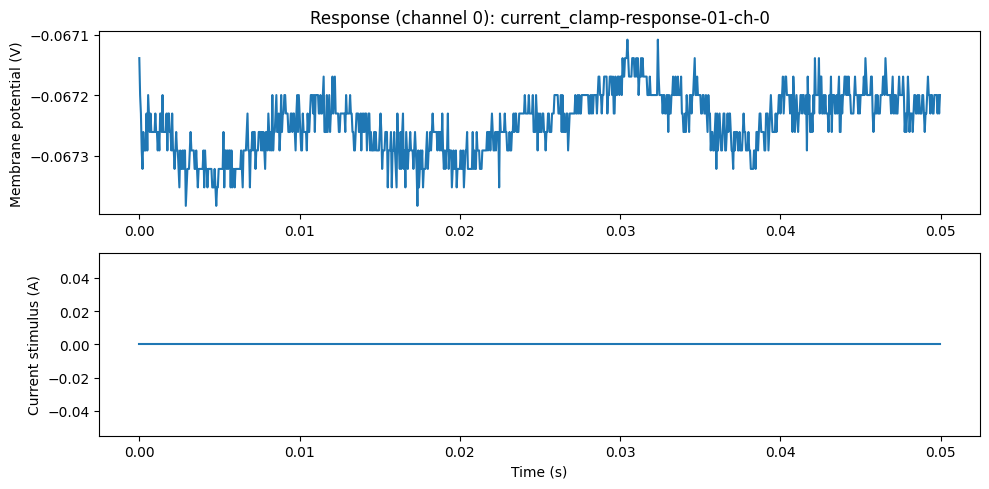

Channel 0 response statistics (first 1000 samples): mean = -0.067246 V, std = 4.9149e-05 V


In [4]:
import matplotlib.pyplot as plt
import numpy as np

resp = nwb.acquisition["current_clamp-response-01-ch-0"]
stim = nwb.stimulus["stimulus-01-ch-0"]
data_resp = resp.data[0:1000] * resp.conversion
data_stim = stim.data[0:1000] * stim.conversion
time = np.arange(1000) / resp.rate

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, data_resp)
plt.title("Response (channel 0): current_clamp-response-01-ch-0")
plt.ylabel("Membrane potential (V)")
plt.subplot(2, 1, 2)
plt.plot(time, data_stim)
plt.ylabel("Current stimulus (A)")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

print(f"Channel 0 response statistics (first 1000 samples): mean = {data_resp.mean():.5g} V, std = {data_resp.std():.5g} V")

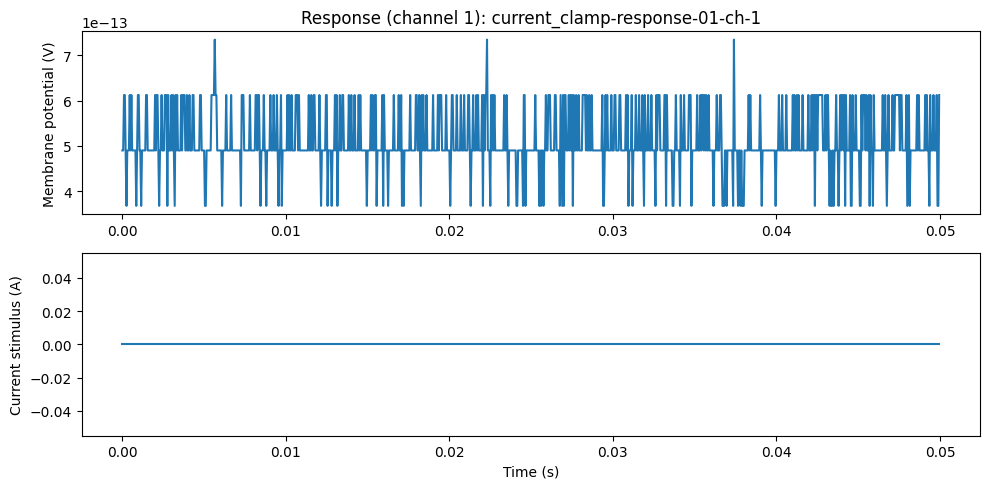

Channel 1 response statistics (first 1000 samples): mean = 5.10e-13 V, std = 6.86e-14 V


In [5]:
resp1 = nwb.acquisition["current_clamp-response-01-ch-1"]
stim1 = nwb.stimulus["stimulus-01-ch-1"]
data_resp1 = resp1.data[0:1000] * resp1.conversion
data_stim1 = stim1.data[0:1000] * stim1.conversion

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, data_resp1)
plt.title("Response (channel 1): current_clamp-response-01-ch-1")
plt.ylabel("Membrane potential (V)")
plt.subplot(2, 1, 2)
plt.plot(time, data_stim1)
plt.ylabel("Current stimulus (A)")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

print(f"Channel 1 response statistics (first 1000 samples): mean = {data_resp1.mean():.2e} V, std = {data_resp1.std():.2e} V")
if np.abs(data_resp1).max() < 1e-11:
    print("Warning: Channel 1 data appears to be near zero (10^-13 V scale), possibly reflecting noise or an empty channel. Interpretation with caution is advised.")

**Note:**  
No nonzero stimulus was observed in the first 50 epochs for either channel in this file.
All stimulus traces examined in these examples are at zero, reflecting spontaneous activity or control periods.

See variable/series lists in earlier cells for additional acquisition and stimulus series available should you wish to explore further epochs or check for later epochs with nonzero current injection.

## Summary and Future Directions

This notebook demonstrated how to:
- Retrieve Dandiset metadata and list data assets via the DANDI API
- Load and inspect the structure of a remote NWB file (using PyNWB, Remfile, and h5py)
- Scan systematically for epochs with stimulus-evoked responses, and document that none were found in the first 50 epochs for this file
- Access and visualize response and stimulus time series for individual epochs
- Perform basic numerical analysis of the response data

**Potential next steps for analysis:**
- Search additional cells/files for epochs with true evoked responses to PAGER activation
- Compute more advanced electrophysiological features, such as spike events, response amplitudes, or compare membrane potential characteristics across conditions
- Aggregate and analyze across the Dandiset to identify trends in neuron responses to chemogenetic activation

For interactive and broader exploration, try the [Neurosift platform](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=draft).

---
**This notebook was AI-generated and has not been fully verified.**